In [1]:
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

import re

In [2]:
def clustering(data, participants): 
    
    cost = []
    silhouette = []

    for i in range(2, participants):
        kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
        kmeans.fit_predict(data)
        
        # Calculate Silhoutte Score
        score = silhouette_score(data, kmeans.labels_, metric='euclidean')
        silhouette.append(score)
    
        # Calculates squared error for the clustered points
        cost.append(kmeans.inertia_)    
        
    # Plot the cost against K values
    plt.plot(range(2, participants), cost, color ='g', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Squared Error (Cost)")
    plt.show() # clear the plot
    
    # Plot the Silhouette Score against K values
    plt.plot(range(2, participants), silhouette, color ='b', linewidth ='3')
    plt.xlabel("Value of K")
    plt.ylabel("Silhouette Score")
    plt.show() # clear the plot
    # the point of the elbow is the
    # most optimal value for choosing k

In [3]:
def silhouette(data, clusters):
    kmeans = KMeans(n_clusters = clusters, max_iter = 500, random_state = 0)
    kmeans.fit_predict(data)
    
    #Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')#ax[q-1][mod])#, ax = ax[x%3][y%2]
    
    #Fit the visualizer
    visualizer.fit(data)
    #fig, ax = plt.subplots(3,2, figsize = (10,10))

## ADARP

In [4]:
adarp_dataset = pd.read_csv('Final_CSVs/adarp_id.csv')

In [5]:
adarp_dataset

,id,EDA_0,EDA_1,EDA_2,EDA_3,EDA_4,EDA_5,EDA_6,EDA_7,EDA_8,EDA_9,EDA_10,EDA_11,EDA_12,EDA_13,EDA_14,EDA_15,EDA_16,EDA_17,EDA_18,EDA_19,EDA_20,EDA_21,EDA_22,EDA_23,EDA_24,EDA_25,EDA_26,EDA_27,EDA_28,EDA_29,EDA_30,EDA_31,EDA_32,EDA_33,EDA_34,EDA_35,EDA_36,EDA_37,EDA_38,EDA_39,EDA_40,EDA_41,EDA_42,EDA_43,EDA_44,EDA_45,EDA_46,EDA_47,EDA_48,EDA_49,EDA_50,EDA_51,EDA_52,EDA_53,EDA_54,EDA_55,EDA_56,EDA_57,EDA_58,EDA_59,EDA_60,EDA_61,EDA_62,EDA_63,EDA_64,EDA_65,EDA_66,EDA_67,EDA_68,EDA_69,EDA_70,EDA_71,EDA_72,EDA_73,EDA_74,EDA_75,EDA_76,EDA_77,EDA_78,EDA_79,EDA_80,EDA_81,EDA_82,EDA_83,EDA_84,EDA_85,EDA_86,EDA_87,EDA_88,EDA_89,EDA_90,EDA_91,EDA_92,EDA_93,EDA_94,EDA_95,EDA_96,EDA_97,EDA_98,EDA_99,EDA_100,EDA_101,EDA_102,EDA_103,EDA_104,EDA_105,EDA_106,EDA_107,EDA_108,EDA_109,EDA_110,EDA_111,EDA_112,EDA_113,EDA_114,EDA_115,EDA_116,EDA_117,EDA_118,EDA_119,EDA_120,EDA_121,EDA_122,EDA_123,EDA_124,EDA_125,EDA_126,EDA_127,EDA_128,EDA_129,EDA_130,EDA_131,EDA_132,EDA_133,EDA_134,EDA_135,EDA_136,EDA_137,EDA_138,EDA_139,EDA_140,EDA_141,EDA_142,EDA_143,EDA_144,EDA_145,EDA_146,EDA_147,EDA_148,EDA_149,EDA_150,EDA_151,EDA_152,EDA_153,EDA_154,EDA_155,EDA_156,EDA_157,EDA_158,EDA_159,EDA_160,EDA_161,EDA_162,EDA_163,EDA_164,EDA_165,EDA_166,EDA_167,EDA_168,EDA_169,EDA_170,EDA_171,EDA_172,EDA_173,EDA_174,EDA_175,EDA_176,EDA_177,EDA_178,EDA_179,EDA_180,EDA_181,EDA_182,EDA_183,EDA_184,EDA_185,EDA_186,EDA_187,EDA_188,EDA_189,EDA_190,EDA_191,EDA_192,EDA_193,EDA_194,EDA_195,EDA_196,EDA_197,EDA_198,EDA_199,EDA_200,EDA_201,EDA_202,EDA_203,EDA_204,EDA_205,EDA_206,EDA_207,EDA_208,EDA_209,EDA_210,EDA_211,EDA_212,EDA_213,EDA_214,EDA_215,EDA_216,EDA_217,EDA_218,EDA_219,EDA_220,EDA_221,EDA_222,EDA_223,EDA_224,EDA_225,EDA_226,EDA_227,EDA_228,EDA_229,EDA_230,EDA_231,EDA_232,EDA_233,EDA_234,EDA_235,EDA_236,EDA_237,EDA_238,EDA_239,TEMP_0,TEMP_1,TEMP_2,TEMP_3,TEMP_4,TEMP_5,TEMP_6,TEMP_7,TEMP_8,...,BVP_3591,BVP_3592,BVP_3593,BVP_3594,BVP_3595,BVP_3596,BVP_3597,BVP_3598,BVP_3599,BVP_3600,BVP_3601,BVP_3602,BVP_3603,BVP_3604,BVP_3605,BVP_3606,BVP_3607,BVP_3608,BVP_3609,BVP_3610,BVP_3611,BVP_3612,BVP_3613,BVP_3614,BVP_3615,BVP_3616,BVP_3617,BVP_3618,BVP_3619,BVP_3620,BVP_3621,BVP_3622,BVP_3623,BVP_3624,BVP_3625,BVP_3626,BVP_3627,BVP_3628,BVP_3629,BVP_3630,BVP_3631,BVP_3632,BVP_3633,BVP_3634,BVP_3635,BVP_3636,BVP_3637,BVP_3638,BVP_3639,BVP_3640,BVP_3641,BVP_3642,BVP_3643,BVP_3644,BVP_3645,BVP_3646,BVP_3647,BVP_3648,BVP_3649,BVP_3650,BVP_3651,BVP_3652,BVP_3653,BVP_3654,BVP_3655,BVP_3656,BVP_3657,BVP_3658,BVP_3659,BVP_3660,BVP_3661,BVP_3662,BVP_3663,BVP_3664,BVP_3665,BVP_3666,BVP_3667,BVP_3668,BVP_3669,BVP_3670,BVP_3671,BVP_3672,BVP_3673,BVP_3674,BVP_3675,BVP_3676,BVP_3677,BVP_3678,BVP_3679,BVP_3680,BVP_3681,BVP_3682,BVP_3683,BVP_3684,BVP_3685,BVP_3686,BVP_3687,BVP_3688,BVP_3689,BVP_3690,BVP_3691,BVP_3692,BVP_3693,BVP_3694,BVP_3695,BVP_3696,BVP_3697,BVP_3698,BVP_3699,BVP_3700,BVP_3701,BVP_3702,BVP_3703,BVP_3704,BVP_3705,BVP_3706,BVP_3707,BVP_3708,BVP_3709,BVP_3710,BVP_3711,BVP_3712,BVP_3713,BVP_3714,BVP_3715,BVP_3716,BVP_3717,BVP_3718,BVP_3719,BVP_3720,BVP_3721,BVP_3722,BVP_3723,BVP_3724,BVP_3725,BVP_3726,BVP_3727,BVP_3728,BVP_3729,BVP_3730,BVP_3731,BVP_3732,BVP_3733,BVP_3734,BVP_3735,BVP_3736,BVP_3737,BVP_3738,BVP_3739,BVP_3740,BVP_3741,BVP_3742,BVP_3743,BVP_3744,BVP_3745,BVP_3746,BVP_3747,BVP_3748,BVP_3749,BVP_3750,BVP_3751,BVP_3752,BVP_3753,BVP_3754,BVP_3755,BVP_3756,BVP_3757,BVP_3758,BVP_3759,BVP_3760,BVP_3761,BVP_3762,BVP_3763,BVP_3764,BVP_3765,BVP_3766,BVP_3767,BVP_3768,BVP_3769,BVP_3770,BVP_3771,BVP_3772,BVP_3773,BVP_3774,BVP_3775,BVP_3776,BVP_3777,BVP_3778,BVP_3779,BVP_3780,BVP_3781,BVP_3782,BVP_3783,BVP_3784,BVP_3785,BVP_3786,BVP_3787,BVP_3788,BVP_3789,BVP_3790,BVP_3791,BVP_3792,BVP_3793,BVP_3794,BVP_3795,BVP_3796,BVP_3797,BVP_3798,BVP_3799,BVP_3800,BVP_3801,BVP_3802,BVP_3803,BVP_3804,BVP_3805,BVP_3806,BVP_3807,BVP_3808,BVP_3809,BVP_3810,BVP_3811,BVP_3812,BVP_3813,BVP_3814,BVP_3815,BVP_3816,BVP_3817,BVP_3818,BVP_3819,BVP_3820,BVP_3821,BVP_3822,BVP_3823,BVP_3824,BVP_3825,BVP_

In [6]:
adarp_features = adarp_dataset.loc[:, ~adarp_dataset.columns.isin(['dataset', 'stress'])]

In [7]:
adarp_features = pd.DataFrame()
adarp_features['id'] = adarp_dataset['id']

In [8]:
acc_cols = [col for col in adarp_dataset.columns if 'ACC' in col]
bvp_cols = [col for col in adarp_dataset.columns if 'BVP' in col]
eda_cols = [col for col in adarp_dataset.columns if 'EDA' in col]
temp_cols = [col for col in adarp_dataset.columns if 'TEMP' in col]

In [9]:
adarp_features["ACC"] = adarp_dataset[acc_cols].apply(lambda x: statistics.mean(x), axis =1)
adarp_features["BVP"] = adarp_dataset[bvp_cols].apply(lambda x: statistics.mean(x), axis =1)
adarp_features["EDA"] = adarp_dataset[eda_cols].apply(lambda x: statistics.mean(x), axis =1)
adarp_features["TEMP"] = adarp_dataset[temp_cols].apply(lambda x: statistics.mean(x), axis =1)

In [10]:
adarp_features

,id,ACC,BVP,EDA,TEMP
0,8,87.056141,-0.105964,271.004839,-1868.786603
1,1,24.218289,0.205137,9.872665,579.856470
2,4,66.354776,0.171591,396.802050,-2609.949869
3,8,-294.392913,1.178388,-96.544704,325.401261
4,3,138.380651,0.345844,-73.417748,575.258694
...,...,...,...,...,...
16352,7,-132.704329,-0.177470,-51.834810,1708.921628
16353,6,83.817857,-0.158137,26.708240,563.751555
16354,1,369.445380,-0.191824,-43.091480,-2090.371065
16355,5,-156.766685,-0.033326,-64.335650,6672.842012


In [11]:
adarp_mean = adarp_features.groupby('id', as_index = False, group_keys = True).mean()
adarp_mean.columns = map(lambda x: x + '_mean', adarp_mean.columns)
adarp_mean = adarp_mean.rename({'id_mean': 'id'}, axis='columns')
adarp_mean

adarp_min = adarp_features.groupby('id', as_index = False, group_keys = True).min()
adarp_min.columns = map(lambda x: x + '_min', adarp_min.columns)
adarp_min = adarp_min.rename({'id_min': 'id'}, axis='columns')
adarp_min

adarp_std = adarp_features.groupby('id', as_index = False, group_keys = True).std()
adarp_std.columns = map(lambda x: x + '_std', adarp_std.columns)
adarp_std = adarp_std.rename({'id_std': 'id'}, axis='columns')
adarp_std

,id,ACC_std,BVP_std,EDA_std,TEMP_std
0,0,187.167398,0.281347,126.542680,510.635824
1,1,225.810138,0.312767,223.377331,1631.651240
2,2,122.693256,0.332713,129.439464,10.375996
3,3,121.445170,0.365210,452.246350,1275.447248
4,4,167.529967,0.399798,686.649171,5647.574597
5,5,139.732682,0.427314,230.497774,3606.120156
6,6,68.855065,0.259821,360.258644,604.655256
7,7,116.649589,0.187998,1553.186876,1007.111861
8,8,156.909637,0.322209,243.384879,1078.485286
9,9,125.255298,0.340415,149.496755,859.069871


In [12]:
scaler = MinMaxScaler()

adarp_mean.loc[:, adarp_mean.columns!='id'] = scaler.fit_transform(adarp_mean.loc[:, adarp_mean.columns!='id'])
adarp_min.loc[:, adarp_min.columns!='id'] = scaler.fit_transform(adarp_min.loc[:, adarp_min.columns!='id'])
adarp_std.loc[:, adarp_std.columns!='id'] = scaler.fit_transform(adarp_std.loc[:, adarp_std.columns!='id'])

In [13]:
#wesad_all_grouped = pd.merge(wesad_extra, wesad_mean, on='id')
adarp_all_grouped = pd.merge(adarp_min, adarp_mean, on='id')
adarp_all_grouped = pd.merge(adarp_std, adarp_all_grouped, on='id')

In [14]:
adarp_all_grouped

,id,ACC_std,BVP_std,EDA_std,TEMP_std,ACC_min,BVP_min,EDA_min,TEMP_min,ACC_mean,BVP_mean,EDA_mean,TEMP_mean
0,0,0.615693,0.463988,0.000000,0.088743,0.798576,0.799142,0.980562,0.815866,0.893109,0.393920,0.043931,0.176999
1,1,0.816788,0.579368,0.067876,0.287603,0.706703,0.687860,1.000000,0.692886,0.213683,1.000000,0.117380,0.256009
2,2,0.280172,0.652613,0.002030,0.000000,0.897139,0.258779,0.941305,1.000000,1.000000,0.594706,0.096945,0.201203
3,3,0.273677,0.771944,0.228301,0.224415,0.923178,0.143334,0.498146,0.771017,0.887556,0.580532,0.115397,0.042269
4,4,0.513500,0.898957,0.392604,1.000000,0.408612,0.300250,0.000000,0.000000,0.868684,0.440641,0.109819,1.000000
5,5,0.368844,1.000000,0.072867,0.637860,0.588477,0.000000,0.863105,0.437029,0.459965,0.252217,0.227154,0.000000
6,6,0.000000,0.384943,0.163822,0.105421,1.000000,0.967761,0.244747,0.872943,0.593919,0.883874,0.000000,0.099551
7,7,0.248721,0.121198,1.000000,0.176814,0.804849,1.000000,0.679888,0.777135,0.815589,0.327821,1.000000,0.223379
8,8,0.458233,0.614041,0.081900,0.189475,0.000000,0.344981,0.821914,0.664342,0.920866,0.414501,0.026126,0.131184
9,9,0.293505,0.680894,0.016090,0.150552,0.768069,0.214407,0.666620,0.879314,0.587222,0.000000,0.098305,0.180531


In [15]:
ids = adarp_all_grouped["id"]
adarp_all_grouped2 = adarp_all_grouped.drop("id", axis = 1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
adarp_all_grouped_pca = pca.fit_transform(adarp_all_grouped2)
print(sum(pca.explained_variance_ratio_))

In [ ]:
adarp_all_grouped_pca = pd.DataFrame(adarp_all_grouped_pca)

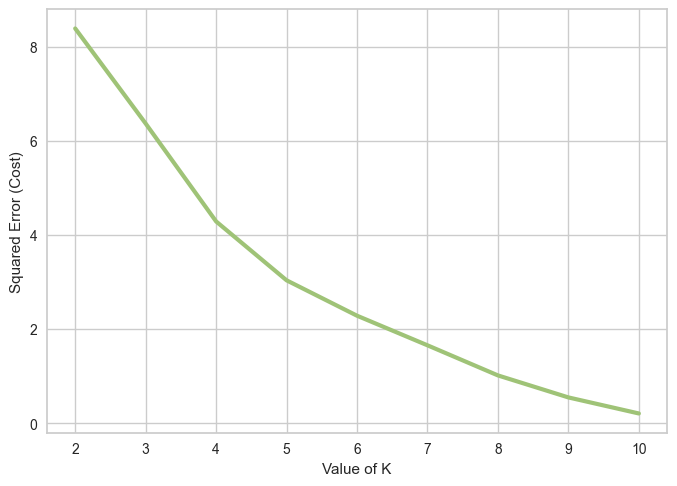

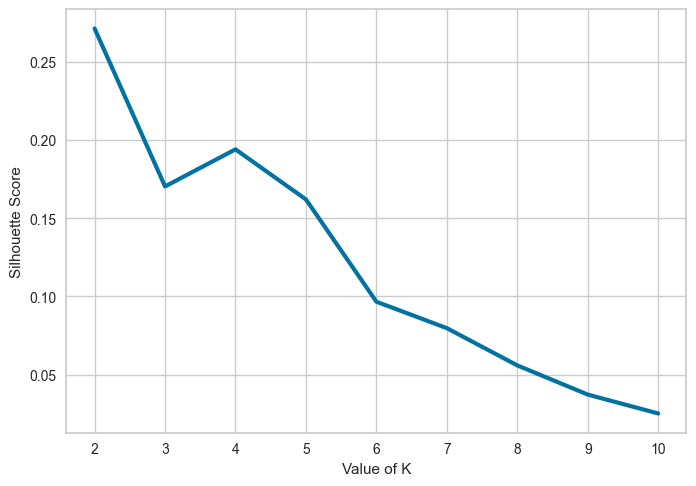

In [16]:
clustering(adarp_all_grouped2, 11)

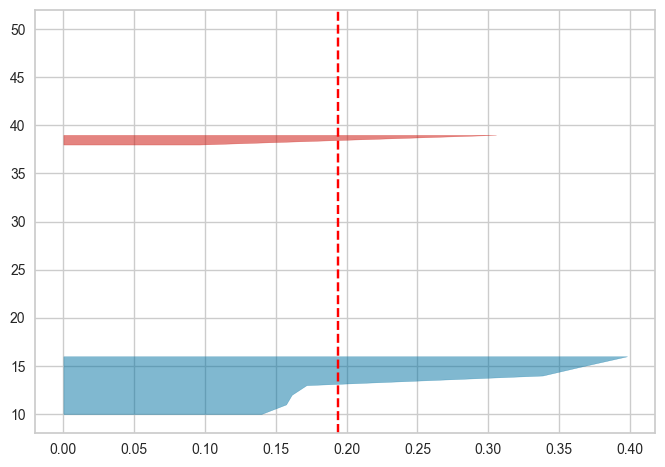

In [17]:
silhouette(adarp_all_grouped2,4)

In [18]:
kmeans = KMeans(n_clusters = 4, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(adarp_all_grouped2)
y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
0          7
2          2
1          1
3          1
dtype: int64

####  Visualization with t-SNE

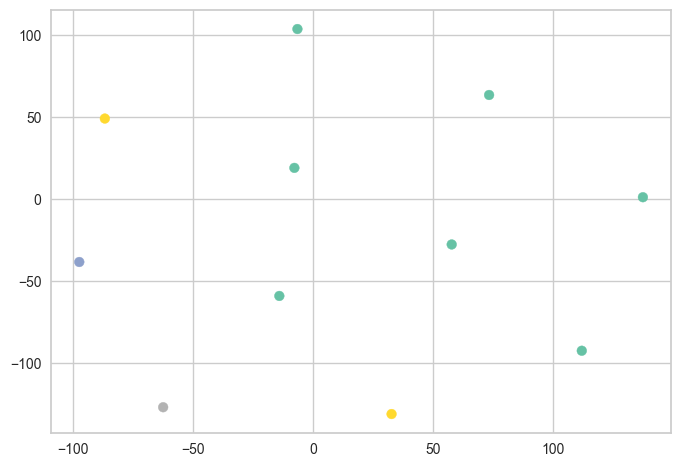

In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters = 4, max_iter = 500, random_state = 0)
model = kmeans.fit(adarp_all_grouped2)
tsne = TSNE().fit_transform(adarp_all_grouped2)
plt.scatter(x = tsne[:, 0], y = tsne[:, 1], c=model.labels_, cmap='Set2')

In [50]:
clusters = pd.concat([ids, y], axis=1)
clusters

,id,Cluster
0,0,0
1,1,1
2,2,0
3,3,0
4,4,4
5,5,0
6,6,2
7,7,3
8,8,0
9,9,0


In [51]:
adarp_grouped_all = pd.merge(adarp_dataset, clusters, on = "id")
adarp_grouped_all

,id,EDA_0,EDA_1,EDA_2,EDA_3,EDA_4,EDA_5,EDA_6,EDA_7,EDA_8,...,BVP_3832,BVP_3833,BVP_3834,BVP_3835,BVP_3836,BVP_3837,BVP_3838,BVP_3839,stress,Cluster
0,8,279.693630,279.693630,277.263096,278.536233,277.263096,275.411261,274.253774,270.434365,275.642741,...,-66.219788,-58.931501,-49.297396,-38.197155,-26.658840,-15.717577,-6.359035,0.593630,0.0,0
1,8,-96.859455,-96.743625,-96.743625,-95.932633,-95.932633,-95.469222,-95.353392,-94.889891,-94.889891,...,313.534227,308.846124,305.850260,303.458515,300.575702,296.011249,288.440334,276.393287,0.0,0
2,8,24.728516,25.423045,24.149637,22.991969,24.959996,26.349233,25.770445,21.486901,19.403044,...,1.823065,-12.470880,-34.141434,-59.157604,-82.926676,-100.810005,-108.801331,-104.466513,0.0,0
3,8,419.906014,398.356009,393.374048,332.315761,366.119795,360.442673,371.217676,389.639364,401.600156,...,107.038653,98.545662,87.632662,74.988562,60.662821,44.114913,25.055141,3.780268,0.0,0
4,8,109.262338,107.989201,104.979970,103.012305,99.308544,97.340970,97.109491,98.266887,98.961325,...,-16.339360,-16.282835,-16.590193,-17.151918,-17.766635,-18.261235,-18.550930,-18.600390,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16352,5,-87.831367,-85.512658,-86.988140,-84.880238,-81.929273,-80.453790,-91.836201,-83.193948,-81.507824,...,-32.504330,-58.658809,-84.355479,-110.043671,-136.744978,-165.633597,-196.654420,-221.490578,0.0,0
16353,5,-79.606117,-78.340947,-76.232550,-74.123989,-71.593814,-70.961229,-70.117837,-70.117837,-70.117837,...,26.235155,20.902523,12.140561,3.285341,-1.559808,-0.432241,5.625255,12.941727,0.0,0
16354,5,-57.442094,-57.231122,-57.653065,-57.442094,-57.231122,-57.020151,-57.020151,-57.020151,-57.020151,...,10.478882,9.546308,8.834160,8.172880,7.439537,6.549352,5.544715,4.455298,0.0,0
16355,5,66.717804,64.820873,63.766839,66.717804,65.663935,64.820873,60.605068,38.683473,-81.885464,...,122.481095,132.408776,130.683513,114.414324,85.830912,51.016206,17.443519,-9.202681,0.0,0


In [ ]:
adarp_grouped_all.to_csv("Final_CSVs/adarp_clusters_4.csv", index = False)

In [22]:
# Drop 'dataset' to run pycaret tests based on "Cluster".

adarp_grouped_all = adarp_grouped_all.drop('dataset', axis = 1)
adarp_grouped_all

KeyError: "['dataset'] not found in axis"

In [52]:
unique_participants = adarp_grouped_all["Cluster"].unique()
adarp_group = adarp_grouped_all.groupby('Cluster')

In [53]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = adarp_group.get_group(participant)
    grid = setup(data=part_df, target='stress', pca = True, pca_components = 200, fix_imbalance = True, html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models(sort="F1")
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

Participant:  0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.681,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.735,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
lr,Logistic Regression,0.681,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
rf,Random Forest Classifier,0.9521,0.5198,0.0115,0.0733,0.0198,0.0064,0.0111,1.350


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136
rf,Random Forest Classifier,0.9521,0.5198,0.0115,0.0733,0.0198,0.0064,0.0111,1.350


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
ada,Ada Boost Classifier,0.6988,0.5227,0.2948,0.0420,0.0735,0.0029,0.0047,1.713
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136
rf,Random Forest Classifier,0.9521,0.5198,0.0115,0.0733,0.0198,0.0064,0.0111,1.350


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
gbc,Gradient Boosting Classifier,0.8241,0.5234,0.1937,0.0519,0.0818,0.0193,0.0245,7.537
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
ada,Ada Boost Classifier,0.6988,0.5227,0.2948,0.0420,0.0735,0.0029,0.0047,1.713
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136
rf,Random Forest Classifier,0.9521,0.5198,0.0115,0.0733,0.0198,0.0064,0.0111,1.350


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
gbc,Gradient Boosting Classifier,0.8241,0.5234,0.1937,0.0519,0.0818,0.0193,0.0245,7.537
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
ada,Ada Boost Classifier,0.6988,0.5227,0.2948,0.0420,0.0735,0.0029,0.0047,1.713
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lda,Linear Discriminant Analysis,0.6796,0.4974,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.240
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
gbc,Gradient Boosting Classifier,0.8241,0.5234,0.1937,0.0519,0.0818,0.0193,0.0245,7.537
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
ada,Ada Boost Classifier,0.6988,0.5227,0.2948,0.0420,0.0735,0.0029,0.0047,1.713
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lda,Linear Discriminant Analysis,0.6796,0.4974,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.240
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
gbc,Gradient Boosting Classifier,0.8241,0.5234,0.1937,0.0519,0.0818,0.0193,0.0245,7.537
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
ada,Ada Boost Classifier,0.6988,0.5227,0.2948,0.0420,0.0735,0.0029,0.0047,1.713
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lda,Linear Discriminant Analysis,0.6796,0.4974,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.240
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
gbc,Gradient Boosting Classifier,0.8241,0.5234,0.1937,0.0519,0.0818,0.0193,0.0245,7.537
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
ada,Ada Boost Classifier,0.6988,0.5227,0.2948,0.0420,0.0735,0.0029,0.0047,1.713
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lda,Linear Discriminant Analysis,0.6796,0.4974,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.240
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7350,0.5650,0.3412,0.0542,0.0936,0.0256,0.0416,0.627
gbc,Gradient Boosting Classifier,0.8241,0.5234,0.1937,0.0519,0.0818,0.0193,0.0245,7.537
dt,Decision Tree Classifier,0.8164,0.5166,0.1903,0.0487,0.0775,0.0140,0.0180,0.517
svm,SVM - Linear Kernel,0.5013,0.0000,0.5120,0.0416,0.0769,0.0022,0.0050,0.304
ada,Ada Boost Classifier,0.6988,0.5227,0.2948,0.0420,0.0735,0.0029,0.0047,1.713
nb,Naive Bayes,0.5006,0.4809,0.4726,0.0386,0.0713,-0.0038,-0.0101,0.077
ridge,Ridge Classifier,0.6796,0.0000,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.077
lda,Linear Discriminant Analysis,0.6796,0.4974,0.3000,0.0393,0.0694,-0.0021,-0.0026,0.240
lr,Logistic Regression,0.6810,0.4992,0.2689,0.0355,0.0626,-0.0093,-0.0149,1.738
qda,Quadratic Discriminant Analysis,0.8254,0.4825,0.1089,0.0303,0.0473,-0.0167,-0.0205,0.136


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
Participant:  1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.637,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037
qda,Quadratic Discriminant Analysis,0.4442,0.3163,0.1854,0.0502,0.0789,-0.1553,-0.2230,0.049


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ada,Ada Boost Classifier,0.7119,0.6819,0.4363,0.2065,0.2801,0.1277,0.1420,0.500
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037
qda,Quadratic Discriminant Analysis,0.4442,0.3163,0.1854,0.0502,0.0789,-0.1553,-0.2230,0.049


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ada,Ada Boost Classifier,0.7119,0.6819,0.4363,0.2065,0.2801,0.1277,0.1420,0.500
gbc,Gradient Boosting Classifier,0.7331,0.6893,0.3506,0.1995,0.2535,0.1065,0.1129,2.194
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037
qda,Quadratic Discriminant Analysis,0.4442,0.3163,0.1854,0.0502,0.0789,-0.1553,-0.2230,0.049


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ada,Ada Boost Classifier,0.7119,0.6819,0.4363,0.2065,0.2801,0.1277,0.1420,0.500
gbc,Gradient Boosting Classifier,0.7331,0.6893,0.3506,0.1995,0.2535,0.1065,0.1129,2.194
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
lda,Linear Discriminant Analysis,0.6224,0.5721,0.4775,0.1657,0.2459,0.0674,0.0842,0.058
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
nb,Naive Bayes,0.3569,0.4038,0.4329,0.0924,0.1513,-0.0789,-0.1564,0.037


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ada,Ada Boost Classifier,0.7119,0.6819,0.4363,0.2065,0.2801,0.1277,0.1420,0.500
gbc,Gradient Boosting Classifier,0.7331,0.6893,0.3506,0.1995,0.2535,0.1065,0.1129,2.194
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
lda,Linear Discriminant Analysis,0.6224,0.5721,0.4775,0.1657,0.2459,0.0674,0.0842,0.058
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
et,Extra Trees Classifier,0.8214,0.6912,0.1374,0.2033,0.1621,0.0684,0.0699,0.132


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ada,Ada Boost Classifier,0.7119,0.6819,0.4363,0.2065,0.2801,0.1277,0.1420,0.500
gbc,Gradient Boosting Classifier,0.7331,0.6893,0.3506,0.1995,0.2535,0.1065,0.1129,2.194
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
lda,Linear Discriminant Analysis,0.6224,0.5721,0.4775,0.1657,0.2459,0.0674,0.0842,0.058
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
lightgbm,Light Gradient Boosting Machine,0.8018,0.6950,0.1754,0.2009,0.1867,0.0747,0.0751,0.829


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ada,Ada Boost Classifier,0.7119,0.6819,0.4363,0.2065,0.2801,0.1277,0.1420,0.500
gbc,Gradient Boosting Classifier,0.7331,0.6893,0.3506,0.1995,0.2535,0.1065,0.1129,2.194
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
lda,Linear Discriminant Analysis,0.6224,0.5721,0.4775,0.1657,0.2459,0.0674,0.0842,0.058
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
lightgbm,Light Gradient Boosting Machine,0.8018,0.6950,0.1754,0.2009,0.1867,0.0747,0.0751,0.829


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6742,0.6920,0.5570,0.2110,0.3055,0.1460,0.1760,0.345
ada,Ada Boost Classifier,0.7119,0.6819,0.4363,0.2065,0.2801,0.1277,0.1420,0.500
gbc,Gradient Boosting Classifier,0.7331,0.6893,0.3506,0.1995,0.2535,0.1065,0.1129,2.194
ridge,Ridge Classifier,0.6224,0.0000,0.4775,0.1657,0.2459,0.0674,0.0842,0.035
lda,Linear Discriminant Analysis,0.6224,0.5721,0.4775,0.1657,0.2459,0.0674,0.0842,0.058
dt,Decision Tree Classifier,0.7354,0.5610,0.3261,0.1913,0.2409,0.0938,0.0988,0.134
lr,Logistic Regression,0.6370,0.5454,0.4468,0.1648,0.2405,0.0645,0.0787,1.195
svm,SVM - Linear Kernel,0.4973,0.0000,0.5146,0.1361,0.2144,0.0117,0.0063,0.071
rf,Random Forest Classifier,0.8085,0.6833,0.1855,0.2234,0.2008,0.0935,0.0948,0.302
lightgbm,Light Gradient Boosting Machine,0.8018,0.6950,0.1754,0.2009,0.1867,0.0747,0.0751,0.829


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
Participant:  4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
ada,Ada Boost Classifier,0.9381,0.4522,0.0333,0.0111,0.0167,-0.0090,-0.0093,0.388
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
ada,Ada Boost Classifier,0.9381,0.4522,0.0333,0.0111,0.0167,-0.0090,-0.0093,0.388
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041
gbc,Gradient Boosting Classifier,0.9738,0.5634,0.0000,0.0000,0.0000,-0.0093,-0.0103,1.657


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
lda,Linear Discriminant Analysis,0.8335,0.5612,0.1667,0.0208,0.0370,0.0032,0.0052,0.049
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
ada,Ada Boost Classifier,0.9381,0.4522,0.0333,0.0111,0.0167,-0.0090,-0.0093,0.388
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
lda,Linear Discriminant Analysis,0.8335,0.5612,0.1667,0.0208,0.0370,0.0032,0.0052,0.049
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
ada,Ada Boost Classifier,0.9381,0.4522,0.0333,0.0111,0.0167,-0.0090,-0.0093,0.388
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
lda,Linear Discriminant Analysis,0.8335,0.5612,0.1667,0.0208,0.0370,0.0032,0.0052,0.049
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
ada,Ada Boost Classifier,0.9381,0.4522,0.0333,0.0111,0.0167,-0.0090,-0.0093,0.388
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
lda,Linear Discriminant Analysis,0.8335,0.5612,0.1667,0.0208,0.0370,0.0032,0.0052,0.049
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
ada,Ada Boost Classifier,0.9381,0.4522,0.0333,0.0111,0.0167,-0.0090,-0.0093,0.388
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8200,0.5871,0.3000,0.0337,0.0605,0.0271,0.0478,0.302
lr,Logistic Regression,0.8232,0.5077,0.2667,0.0299,0.0538,0.0202,0.0364,0.896
nb,Naive Bayes,0.5003,0.4548,0.5000,0.0194,0.0374,0.0005,0.0001,0.029
ridge,Ridge Classifier,0.8335,0.0000,0.1667,0.0208,0.0370,0.0032,0.0052,0.029
lda,Linear Discriminant Analysis,0.8335,0.5612,0.1667,0.0208,0.0370,0.0032,0.0052,0.049
svm,SVM - Linear Kernel,0.4199,0.0000,0.5000,0.0164,0.0318,-0.0054,-0.0226,0.049
dt,Decision Tree Classifier,0.9279,0.4893,0.0333,0.0167,0.0222,-0.0060,-0.0090,0.104
ada,Ada Boost Classifier,0.9381,0.4522,0.0333,0.0111,0.0167,-0.0090,-0.0093,0.388
rf,Random Forest Classifier,0.9809,0.6102,0.0000,0.0000,0.0000,0.0000,0.0000,0.229
qda,Quadratic Discriminant Analysis,0.9809,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.041


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
Participant:  2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6423,0.5079,0.31,0.0759,0.121,0.0052,-0.005,0.603


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015
ada,Ada Boost Classifier,0.8172,0.4537,0.000,0.0000,0.0000,-0.0931,-0.0974,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015
ada,Ada Boost Classifier,0.8172,0.4537,0.000,0.0000,0.0000,-0.0931,-0.0974,0.136
gbc,Gradient Boosting Classifier,0.9029,0.5313,0.000,0.0000,0.0000,-0.0345,-0.0377,0.549


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
lda,Linear Discriminant Analysis,0.6617,0.4551,0.200,0.0499,0.0788,-0.0395,-0.0568,0.074
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015
ada,Ada Boost Classifier,0.8172,0.4537,0.000,0.0000,0.0000,-0.0931,-0.0974,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
lda,Linear Discriminant Analysis,0.6617,0.4551,0.200,0.0499,0.0788,-0.0395,-0.0568,0.074
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015
ada,Ada Boost Classifier,0.8172,0.4537,0.000,0.0000,0.0000,-0.0931,-0.0974,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
lda,Linear Discriminant Analysis,0.6617,0.4551,0.200,0.0499,0.0788,-0.0395,-0.0568,0.074
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015
ada,Ada Boost Classifier,0.8172,0.4537,0.000,0.0000,0.0000,-0.0931,-0.0974,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
lda,Linear Discriminant Analysis,0.6617,0.4551,0.200,0.0499,0.0788,-0.0395,-0.0568,0.074
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015
ada,Ada Boost Classifier,0.8172,0.4537,0.000,0.0000,0.0000,-0.0931,-0.0974,0.136


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6571,0.6021,0.535,0.1094,0.1812,0.0717,0.1095,0.359
svm,SVM - Linear Kernel,0.4062,0.0000,0.675,0.0788,0.1410,0.0157,0.0329,0.013
dt,Decision Tree Classifier,0.7994,0.5366,0.230,0.0880,0.1269,0.0336,0.0423,0.026
lr,Logistic Regression,0.6423,0.5079,0.310,0.0759,0.1210,0.0052,-0.0050,0.603
nb,Naive Bayes,0.5323,0.4442,0.440,0.0658,0.1133,-0.0099,-0.0101,0.011
ridge,Ridge Classifier,0.6617,0.0000,0.200,0.0499,0.0788,-0.0395,-0.0568,0.011
lda,Linear Discriminant Analysis,0.6617,0.4551,0.200,0.0499,0.0788,-0.0395,-0.0568,0.074
rf,Random Forest Classifier,0.9256,0.5568,0.000,0.0000,0.0000,-0.0055,-0.0076,0.091
qda,Quadratic Discriminant Analysis,0.9288,0.5000,0.000,0.0000,0.0000,0.0000,0.0000,0.015
ada,Ada Boost Classifier,0.8172,0.4537,0.000,0.0000,0.0000,-0.0931,-0.0974,0.136


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
Participant:  3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.582,0.5398,0.5,0.1304,0.2055,0.0391,0.0578,0.636


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
rf,Random Forest Classifier,0.8735,0.5129,0.0286,0.0667,0.0400,0.0085,0.0047,0.091


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
rf,Random Forest Classifier,0.8735,0.5129,0.0286,0.0667,0.0400,0.0085,0.0047,0.091
qda,Quadratic Discriminant Analysis,0.8892,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
ada,Ada Boost Classifier,0.7532,0.4895,0.2000,0.1223,0.1497,0.0162,0.0176,0.135
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
rf,Random Forest Classifier,0.8735,0.5129,0.0286,0.0667,0.0400,0.0085,0.0047,0.091
qda,Quadratic Discriminant Analysis,0.8892,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
ada,Ada Boost Classifier,0.7532,0.4895,0.2000,0.1223,0.1497,0.0162,0.0176,0.135
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
gbc,Gradient Boosting Classifier,0.8244,0.4993,0.0429,0.0676,0.0510,-0.0396,-0.0405,0.583
rf,Random Forest Classifier,0.8735,0.5129,0.0286,0.0667,0.0400,0.0085,0.0047,0.091
qda,Quadratic Discriminant Analysis,0.8892,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
lda,Linear Discriminant Analysis,0.6250,0.5494,0.4000,0.1257,0.1898,0.0269,0.0351,0.017
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
ada,Ada Boost Classifier,0.7532,0.4895,0.2000,0.1223,0.1497,0.0162,0.0176,0.135
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
gbc,Gradient Boosting Classifier,0.8244,0.4993,0.0429,0.0676,0.0510,-0.0396,-0.0405,0.583
rf,Random Forest Classifier,0.8735,0.5129,0.0286,0.0667,0.0400,0.0085,0.0047,0.091


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
lda,Linear Discriminant Analysis,0.6250,0.5494,0.4000,0.1257,0.1898,0.0269,0.0351,0.017
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
ada,Ada Boost Classifier,0.7532,0.4895,0.2000,0.1223,0.1497,0.0162,0.0176,0.135
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
gbc,Gradient Boosting Classifier,0.8244,0.4993,0.0429,0.0676,0.0510,-0.0396,-0.0405,0.583
rf,Random Forest Classifier,0.8735,0.5129,0.0286,0.0667,0.0400,0.0085,0.0047,0.091


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
lda,Linear Discriminant Analysis,0.6250,0.5494,0.4000,0.1257,0.1898,0.0269,0.0351,0.017
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
ada,Ada Boost Classifier,0.7532,0.4895,0.2000,0.1223,0.1497,0.0162,0.0176,0.135
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
lightgbm,Light Gradient Boosting Machine,0.8545,0.5003,0.0429,0.0833,0.0554,-0.0041,-0.0089,0.683
gbc,Gradient Boosting Classifier,0.8244,0.4993,0.0429,0.0676,0.0510,-0.0396,-0.0405,0.583


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
lda,Linear Discriminant Analysis,0.6250,0.5494,0.4000,0.1257,0.1898,0.0269,0.0351,0.017
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
ada,Ada Boost Classifier,0.7532,0.4895,0.2000,0.1223,0.1497,0.0162,0.0176,0.135
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
lightgbm,Light Gradient Boosting Machine,0.8545,0.5003,0.0429,0.0833,0.0554,-0.0041,-0.0089,0.683
gbc,Gradient Boosting Classifier,0.8244,0.4993,0.0429,0.0676,0.0510,-0.0396,-0.0405,0.583


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5002,0.5509,0.5857,0.1267,0.2077,0.0313,0.0478,0.342
lr,Logistic Regression,0.5820,0.5398,0.5000,0.1304,0.2055,0.0391,0.0578,0.636
svm,SVM - Linear Kernel,0.4097,0.0000,0.6714,0.1186,0.2011,0.0162,0.0343,0.012
ridge,Ridge Classifier,0.6250,0.0000,0.4000,0.1257,0.1898,0.0269,0.0351,0.010
lda,Linear Discriminant Analysis,0.6250,0.5494,0.4000,0.1257,0.1898,0.0269,0.0351,0.017
nb,Naive Bayes,0.4764,0.4671,0.4429,0.0963,0.1578,-0.0291,-0.0485,0.010
ada,Ada Boost Classifier,0.7532,0.4895,0.2000,0.1223,0.1497,0.0162,0.0176,0.135
dt,Decision Tree Classifier,0.7406,0.5040,0.2000,0.1165,0.1466,0.0083,0.0075,0.024
lightgbm,Light Gradient Boosting Machine,0.8545,0.5003,0.0429,0.0833,0.0554,-0.0041,-0.0089,0.683
gbc,Gradient Boosting Classifier,0.8244,0.4993,0.0429,0.0676,0.0510,-0.0396,-0.0405,0.583


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [54]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [55]:
print("Mean Accuracy ADARP - Cluster All Features: ", mean_acc)
print("Mean Precision ADARP- Cluster All Features: ", mean_prec)
print("Mean Recall ADARP- Cluster All Features: ", mean_rec)
print("Mean F1-score ADARP- Cluster All Features: ", mean_f1)

Mean Accuracy ADARP - Cluster All Features:  0.6773
Mean Precision ADARP- Cluster All Features:  0.107
Mean Recall ADARP- Cluster All Features:  0.46378
Mean F1-score ADARP- Cluster All Features:  0.1697


In [63]:
clusters

,id,Cluster
0,0,0
1,1,2
2,2,0
3,3,0
4,4,1
5,5,0
6,6,0
7,7,3
8,8,0
9,9,0


In [68]:
adarp_dataset_new = pd.read_csv("Final_CSVs/adarp_new.csv")

In [69]:
adarp_dataset_new

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,id,dataset,stress
0,20.513261,20.935081,-47.196465,-3.260985,4.507111,0.716637,0.303609,-0.124521,1.554185,0.872075,...,4.887624,3.015592,-2.245096,1.452785,-1.587706,-1.760503,2.011873,8,Train,0.0
1,92.417520,-21.996034,14.541838,1.649816,-5.103676,-2.204086,-12.916046,-8.806577,20.147872,0.889388,...,-1.509922,3.669814,1.374393,-2.458410,-0.429740,1.754223,-0.090012,1,Train,1.0
2,-33.102149,-25.279355,18.484651,5.258636,-3.633260,-1.777928,0.609462,-1.762000,-9.085495,-2.921152,...,0.258656,0.035151,-0.303729,-0.385087,-0.506989,-0.520648,-0.201086,3,Train,1.0
3,35.193078,-47.192845,-18.580473,3.686088,-4.581467,-3.020590,-7.064863,1.519770,-8.749378,4.872315,...,-0.376895,0.058002,-0.757182,-0.087456,-0.128169,0.339075,-0.838829,2,Train,0.0
4,44.319440,22.393429,48.325996,-0.647691,-0.581191,-1.557754,-18.945942,0.094177,-18.148259,9.633245,...,2.074177,1.789060,0.861509,3.254957,-0.424161,-2.378359,0.299103,9,Train,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27103,-14.183324,69.585348,32.609356,-3.750749,0.883306,0.031458,-0.639752,0.862550,-0.214938,1.032628,...,-0.173204,-0.016553,-0.101481,0.192474,0.151399,0.389866,-0.139952,1,Test,0.0
27104,6.289888,-32.050495,87.843617,4.951944,-9.923721,16.940356,0.339763,-3.149450,8.660654,-0.037309,...,-0.482223,-1.560710,0.559244,-3.376335,-0.160281,1.505873,-0.992808,8,Test,0.0
27105,-52.526937,117.548782,-19.696015,9.568756,-21.686070,3.745054,2.493357,2.038464,-3.945271,3.929809,...,-0.237621,-0.553347,0.353389,0.205311,1.381038,0.067580,2.151312,10,Test,0.0
27106,-28.249098,-26.997105,54.082033,0.550082,-1.863535,-0.258588,0.668584,-0.656412,-1.946633,-0.691243,...,-1.055964,-1.498716,1.744852,0.092225,1.233039,-1.125368,-0.894168,2,Test,0.0


In [70]:
adarp_dataset_new = pd.merge(adarp_dataset_new, clusters, on = "id")

In [72]:
adarp_dataset_new["Cluster"].value_counts()

0    15727
2     5824
1     3021
3     2536
Name: Cluster, dtype: int64

In [73]:
adarp_dataset_new.to_csv("Final_CSVs/adarp_clusters4.csv", index = False)